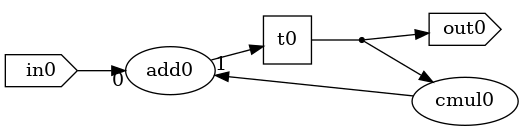

In [1]:
from b_asic.core_operations import Addition, ConstantMultiplication
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output

i = Input()
d = Delay()
o = Output(d)
c = ConstantMultiplication(0.5, d)
a = Addition(i, c)
d.input(0).connect(a)

sfg = SFG([i], [o])

sfg

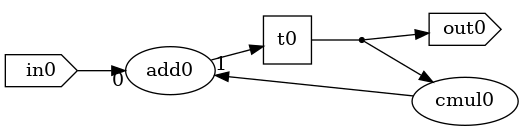

In [1]:
from b_asic.core_operations import Addition, ConstantMultiplication
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output

i = Input()
d = Delay()
o = Output(d)
a = i + 0.5 * d
d <<= a

sfg = SFG([i], [o])

sfg

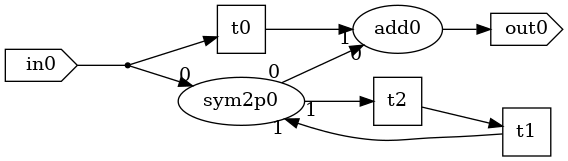

In [5]:
from b_asic.core_operations import SymmetricTwoportAdaptor
from b_asic.signal_flow_graph import SFG
from b_asic.special_operations import Delay, Input, Output

in0 = Input("x")
D0 = Delay(in0)
D1 = Delay()
D2 = Delay(D1)
s = SymmetricTwoportAdaptor(-0.375, in0, D2)
D1 <<= s.output(1)
a = s.output(0) + D0
out0 = Output(a, "y")

sfg = SFG(inputs=[in0], outputs=[out0], name="Third-order␣BLWDF")

sfg

<StemContainer object of 3 artists>

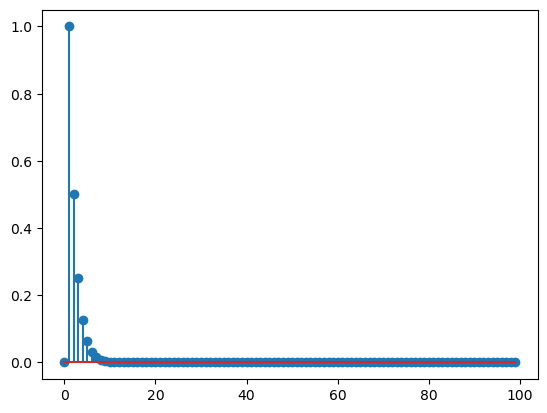

In [22]:
from b_asic.simulation import Simulation
import numpy as np
import matplotlib.pyplot as plt

impulse = np.zeros(100)
impulse[0] = 1
sim = Simulation(sfg, [impulse])
sim.run()

fig, ax = plt.subplots()
ax.stem(sim.results["0"])

<StemContainer object of 3 artists>

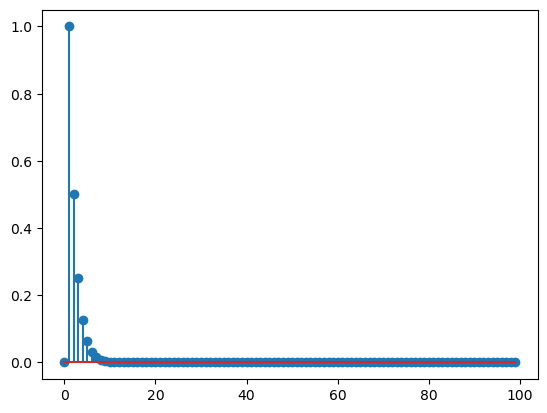

In [21]:
from b_asic.signal_generator import Impulse

sim = Simulation(sfg, [Impulse()])
sim.run_for(100)

fig, ax = plt.subplots()
ax.stem(sim.results["0"])

<StemContainer object of 3 artists>

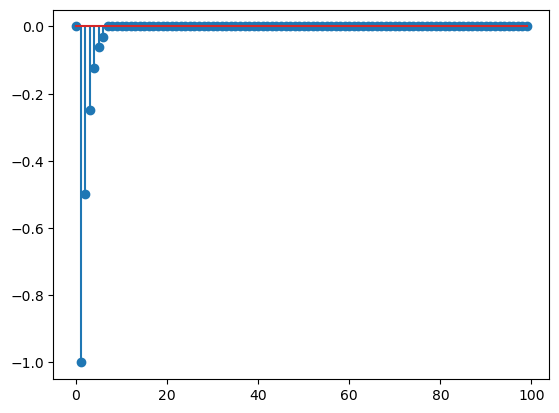

In [26]:

sim = Simulation(sfg, [Impulse()])
sim.run_for(100, bits_override=5)

fig, ax = plt.subplots()
ax.stem(sim.results["0"])

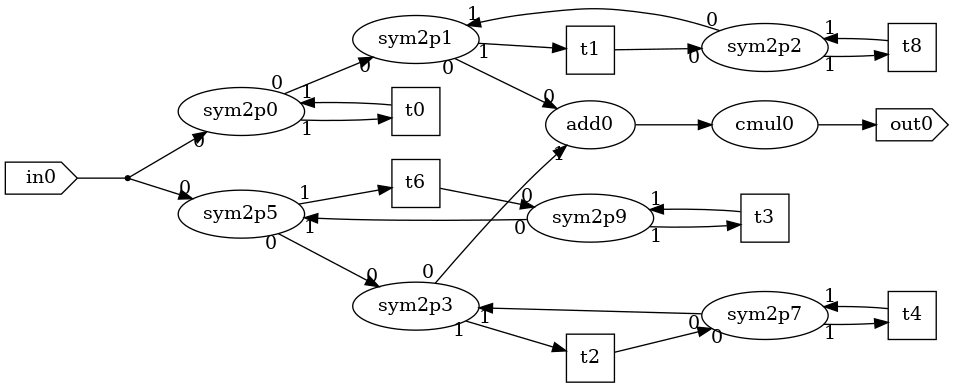

In [41]:
from b_asic.sfg_generators import wdf_allpass

a1 = a2 = a5 = a6 = 1

allpass_lower = wdf_allpass([a1, a2, a5, a6])

x = Input()
x.graph_id = "in0"

a0 = a3 = a4 = 1

allpass_upper = wdf_allpass([a0, a3, a4]) 
allpass_lower = wdf_allpass([a1, a2, a5, a6])

allpass_upper <<= x
allpass_lower <<= x
y = Output((allpass_upper + allpass_lower) * 0.5)

allpass_upper.connect_external_signals_to_components()
allpass_lower.connect_external_signals_to_components()

sfg = SFG([x], [y])
sfg

In [44]:
pipelined_sfg = sfg.insert_operation_after(Delay(), "in0")

#pipelined_sfg

TypeError: Only operations with one input and one output can be inserted.

In [45]:
sfg.precedence_graph

<bound method SFG.print_precedence_graph of <b_asic.signal_flow_graph.SFG object at 0x7f989c590620>>